In [108]:
#Importing required libraries

import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tqdm.autonotebook import tqdm

import numpy as np #
import pandas as pd 

from keras import Sequential
from keras.callbacks import EarlyStopping

from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
# from keras import regularizers
from tensorflow.keras.models import Model


from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.applications.imagenet_utils import decode_predictions

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [109]:
#reading labels csv file

labels = pd.read_csv('D:\Data\Training_set.csv')
labels.head()

<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\qfluz.47279\AppData\Local\Temp\ipykernel_15768\1715876964.py:3: SyntaxWarning: invalid escape sequence '\D'
  labels = pd.read_csv('D:\Data\Training_set.csv')


filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

In [110]:
#describe
labels.describe()

filename           label
count          6499            6499
unique         6499              75
top     Image_1.jpg  MOURNING CLOAK
freq              1             131

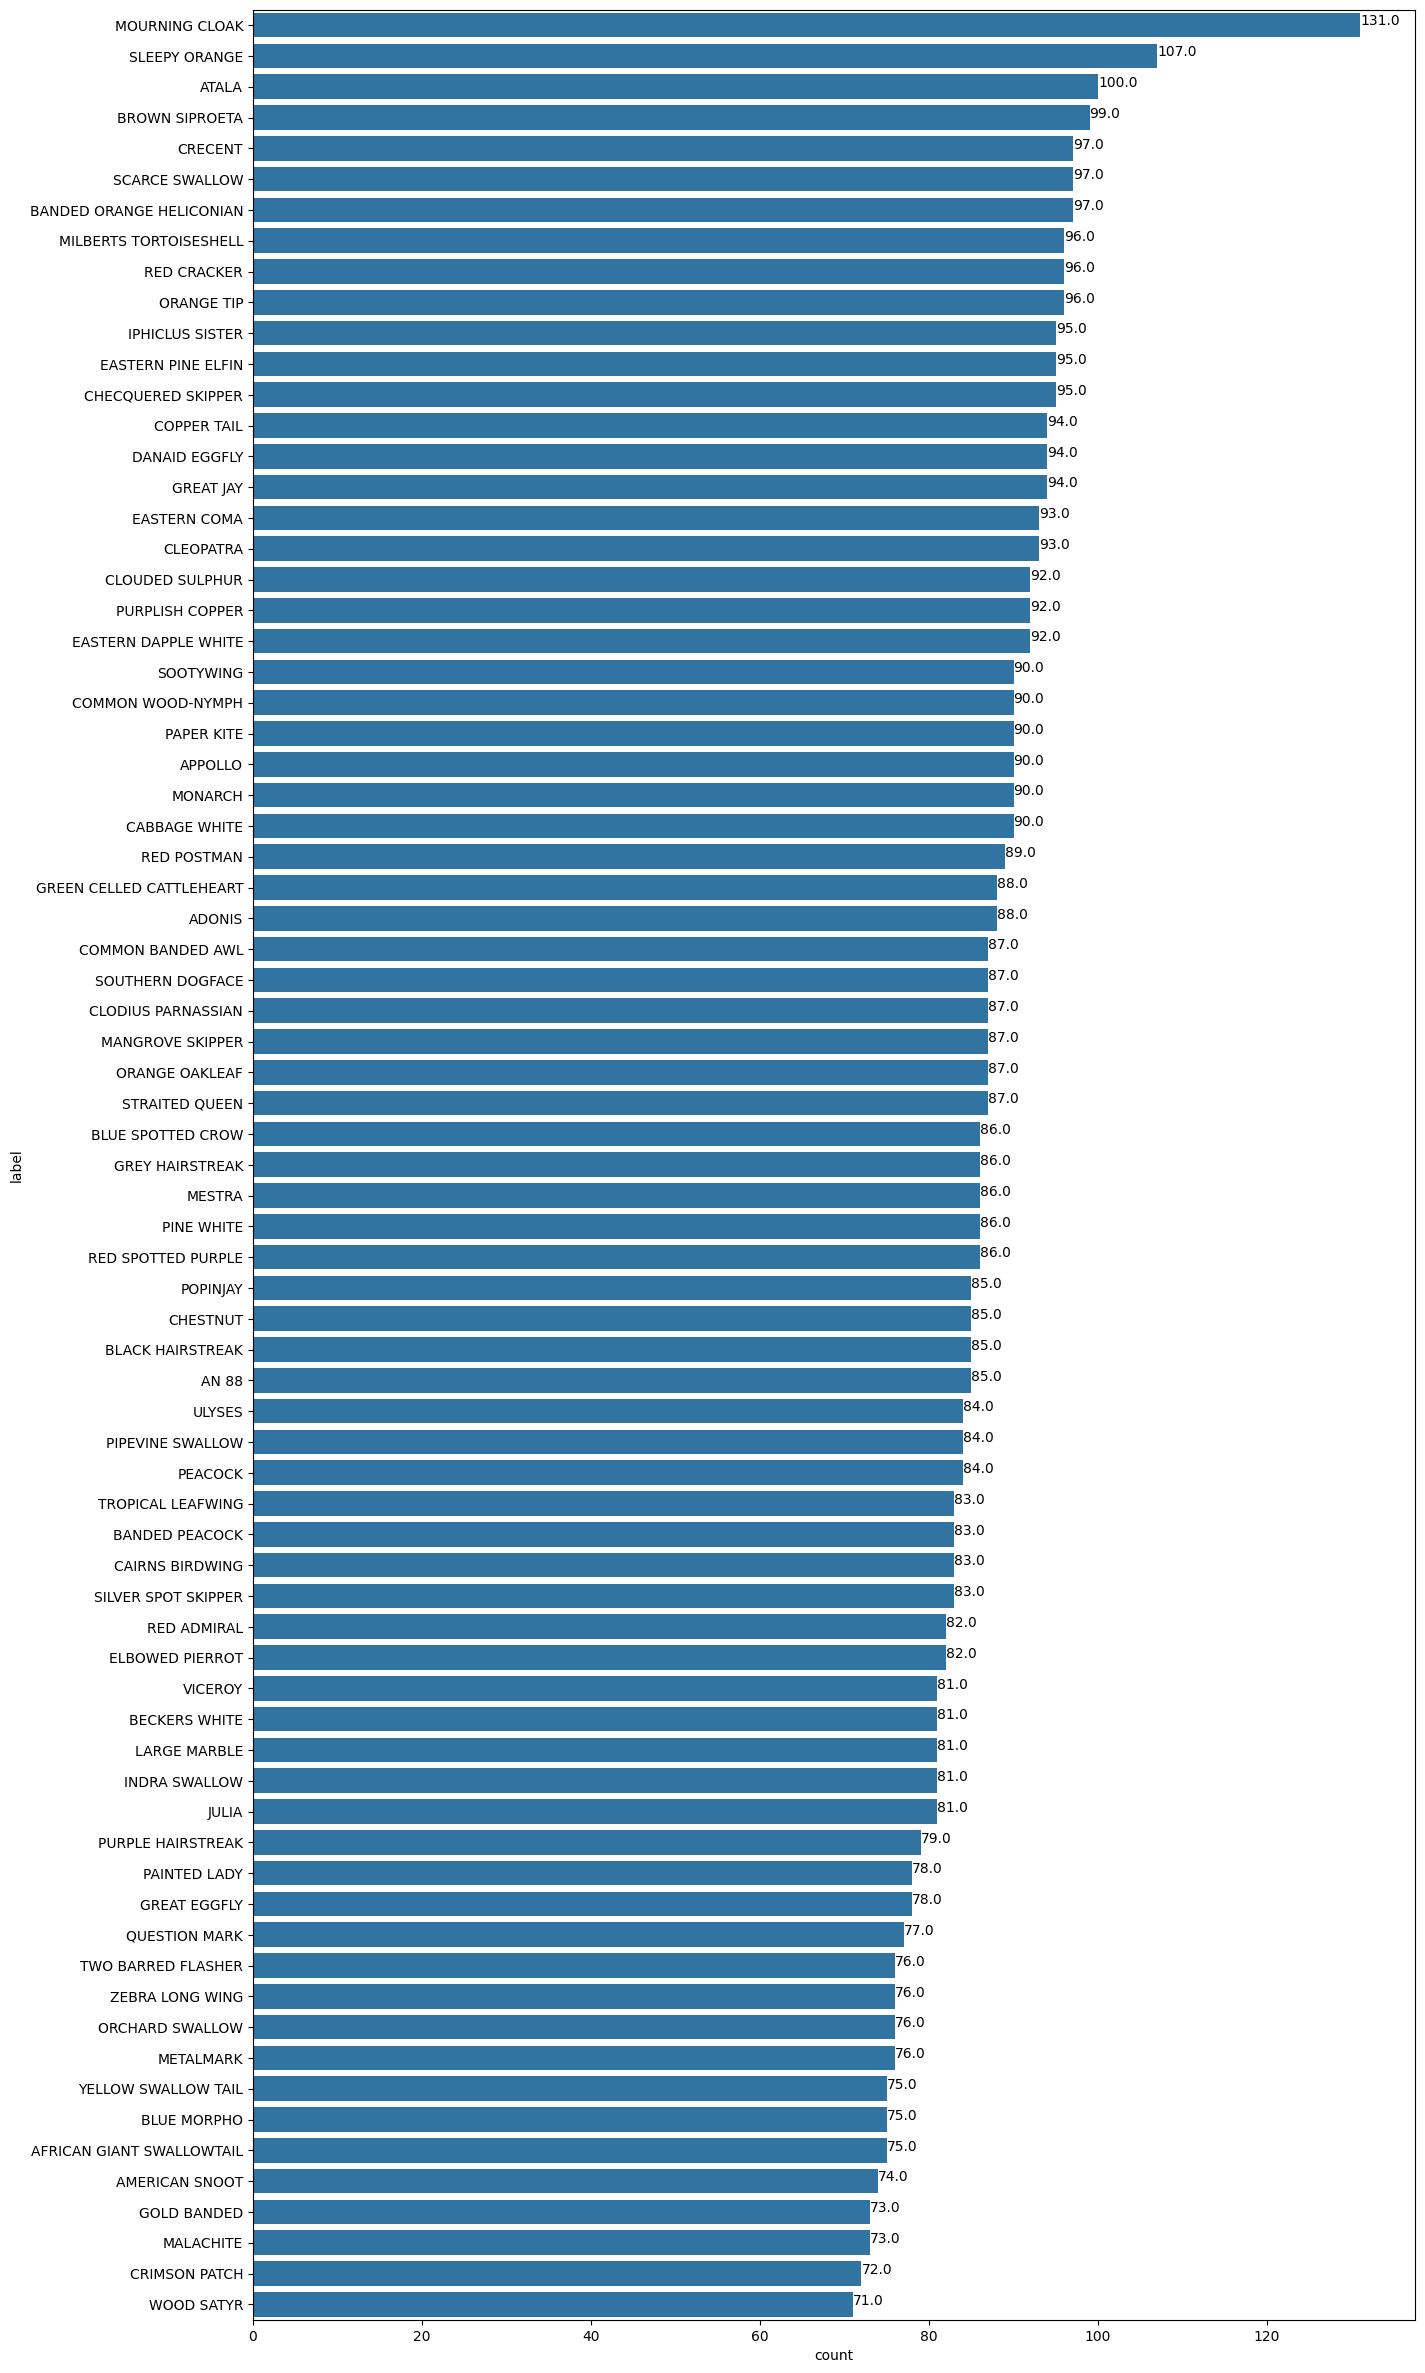

In [111]:
#function to show bar length
def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))
        
#finding top dog brands

plt.figure(figsize = (15,30))
ax0 =sns.countplot(y=labels['label'],order=labels['label'].value_counts().index)
barw(ax0)
plt.show()

In [112]:
# #total unique breeds
labels['label'].nunique()

75

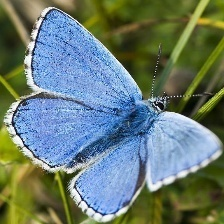

In [113]:
# Lets check one image
from IPython.display import display, Image
Image("D:/Data/train/Image_2.jpg")

In [114]:
import os
if len(os.listdir('D:/Data/train')) == len(labels['label']):
    print('Number of file matches number of actual images!')
else:
    print('Number of file doesnot matches number of actual images!!')

Number of file matches number of actual images!


In [115]:
#Create list of alphabetically sorted labels.
classes = sorted(list(set(labels['label'])))
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))



#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 75


{'ADONIS': 0,
 'AFRICAN GIANT SWALLOWTAIL': 1,
 'AMERICAN SNOOT': 2,
 'AN 88': 3,
 'APPOLLO': 4,
 'ATALA': 5,
 'BANDED ORANGE HELICONIAN': 6,
 'BANDED PEACOCK': 7,
 'BECKERS WHITE': 8,
 'BLACK HAIRSTREAK': 9,
 'BLUE MORPHO': 10,
 'BLUE SPOTTED CROW': 11,
 'BROWN SIPROETA': 12,
 'CABBAGE WHITE': 13,
 'CAIRNS BIRDWING': 14,
 'CHECQUERED SKIPPER': 15,
 'CHESTNUT': 16,
 'CLEOPATRA': 17,
 'CLODIUS PARNASSIAN': 18,
 'CLOUDED SULPHUR': 19,
 'COMMON BANDED AWL': 20,
 'COMMON WOOD-NYMPH': 21,
 'COPPER TAIL': 22,
 'CRECENT': 23,
 'CRIMSON PATCH': 24,
 'DANAID EGGFLY': 25,
 'EASTERN COMA': 26,
 'EASTERN DAPPLE WHITE': 27,
 'EASTERN PINE ELFIN': 28,
 'ELBOWED PIERROT': 29,
 'GOLD BANDED': 30,
 'GREAT EGGFLY': 31,
 'GREAT JAY': 32,
 'GREEN CELLED CATTLEHEART': 33,
 'GREY HAIRSTREAK': 34,
 'INDRA SWALLOW': 35,
 'IPHICLUS SISTER': 36,
 'JULIA': 37,
 'LARGE MARBLE': 38,
 'MALACHITE': 39,
 'MANGROVE SKIPPER': 40,
 'MESTRA': 41,
 'METALMARK': 42,
 'MILBERTS TORTOISESHELL': 43,
 'MONARCH': 44,
 'MOURNING

In [118]:

input_shape = (331,331,3)


def images_to_array(directory, label_dataframe, target_size = input_shape):

    image_labels = label_dataframe['label']
    images = np.zeros([len(label_dataframe), target_size[0], target_size[1], target_size[2]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([len(label_dataframe),1],dtype = np.uint8)

    for ix, image_name in enumerate(tqdm(label_dataframe['filename'].values)):
        img_dir = os.path.join(directory, image_name  )
        img = load_img(img_dir, target_size = target_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img

        butterfly_breed = image_labels[ix]
        y[ix] = class_to_num[butterfly_breed]

    y = to_categorical(y)

    return images,y

In [119]:
import time 
t = time.time()

X,y = images_to_array('D:/Data/train', labels[:])



100%|██████████| 6499/6499 [00:14<00:00, 440.68it/s]


In [120]:
print('runtime in seconds: {}'.format(time.time() - t))

runtime in seconds: 18.20141363143921


In [122]:
 y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [123]:
X[0]

array([[[ 25,  43,  31],
        [ 25,  43,  31],
        [ 25,  43,  31],
        ...,
        [ 40,  53,  27],
        [ 40,  53,  27],
        [ 46,  59,  33]],

       [[ 26,  44,  32],
        [ 25,  43,  29],
        [ 25,  43,  29],
        ...,
        [ 53,  63,  38],
        [ 53,  63,  38],
        [ 56,  69,  41]],

       [[ 26,  44,  32],
        [ 25,  43,  29],
        [ 25,  43,  29],
        ...,
        [ 53,  63,  38],
        [ 53,  63,  38],
        [ 56,  69,  41]],

       ...,

       [[ 64,  98,  63],
        [ 71, 107,  69],
        [ 71, 107,  69],
        ...,
        [ 43,  66,  20],
        [ 43,  66,  20],
        [ 42,  68,  20]],

       [[ 64,  98,  63],
        [ 71, 107,  69],
        [ 71, 107,  69],
        ...,
        [ 43,  66,  20],
        [ 43,  66,  20],
        [ 42,  68,  20]],

       [[ 70, 104,  69],
        [ 73, 109,  71],
        [ 73, 109,  71],
        ...,
        [ 42,  68,  21],
        [ 42,  68,  21],
        [ 43,  69,  21]]

In [124]:
## Another way to create one hot encoded vectors
# dummy = pd.get_dummies(df_50['breed'])

# classes = dummy.columns 
# print('we have total {} number of unique dog breeds'.format(len(classes)))

#convert this into np.array

# y = np.array(dummy)
# # we can delete the dummy because we dont need it anymore ----- > We are saving RAM

# del dummy

# y[0:2]

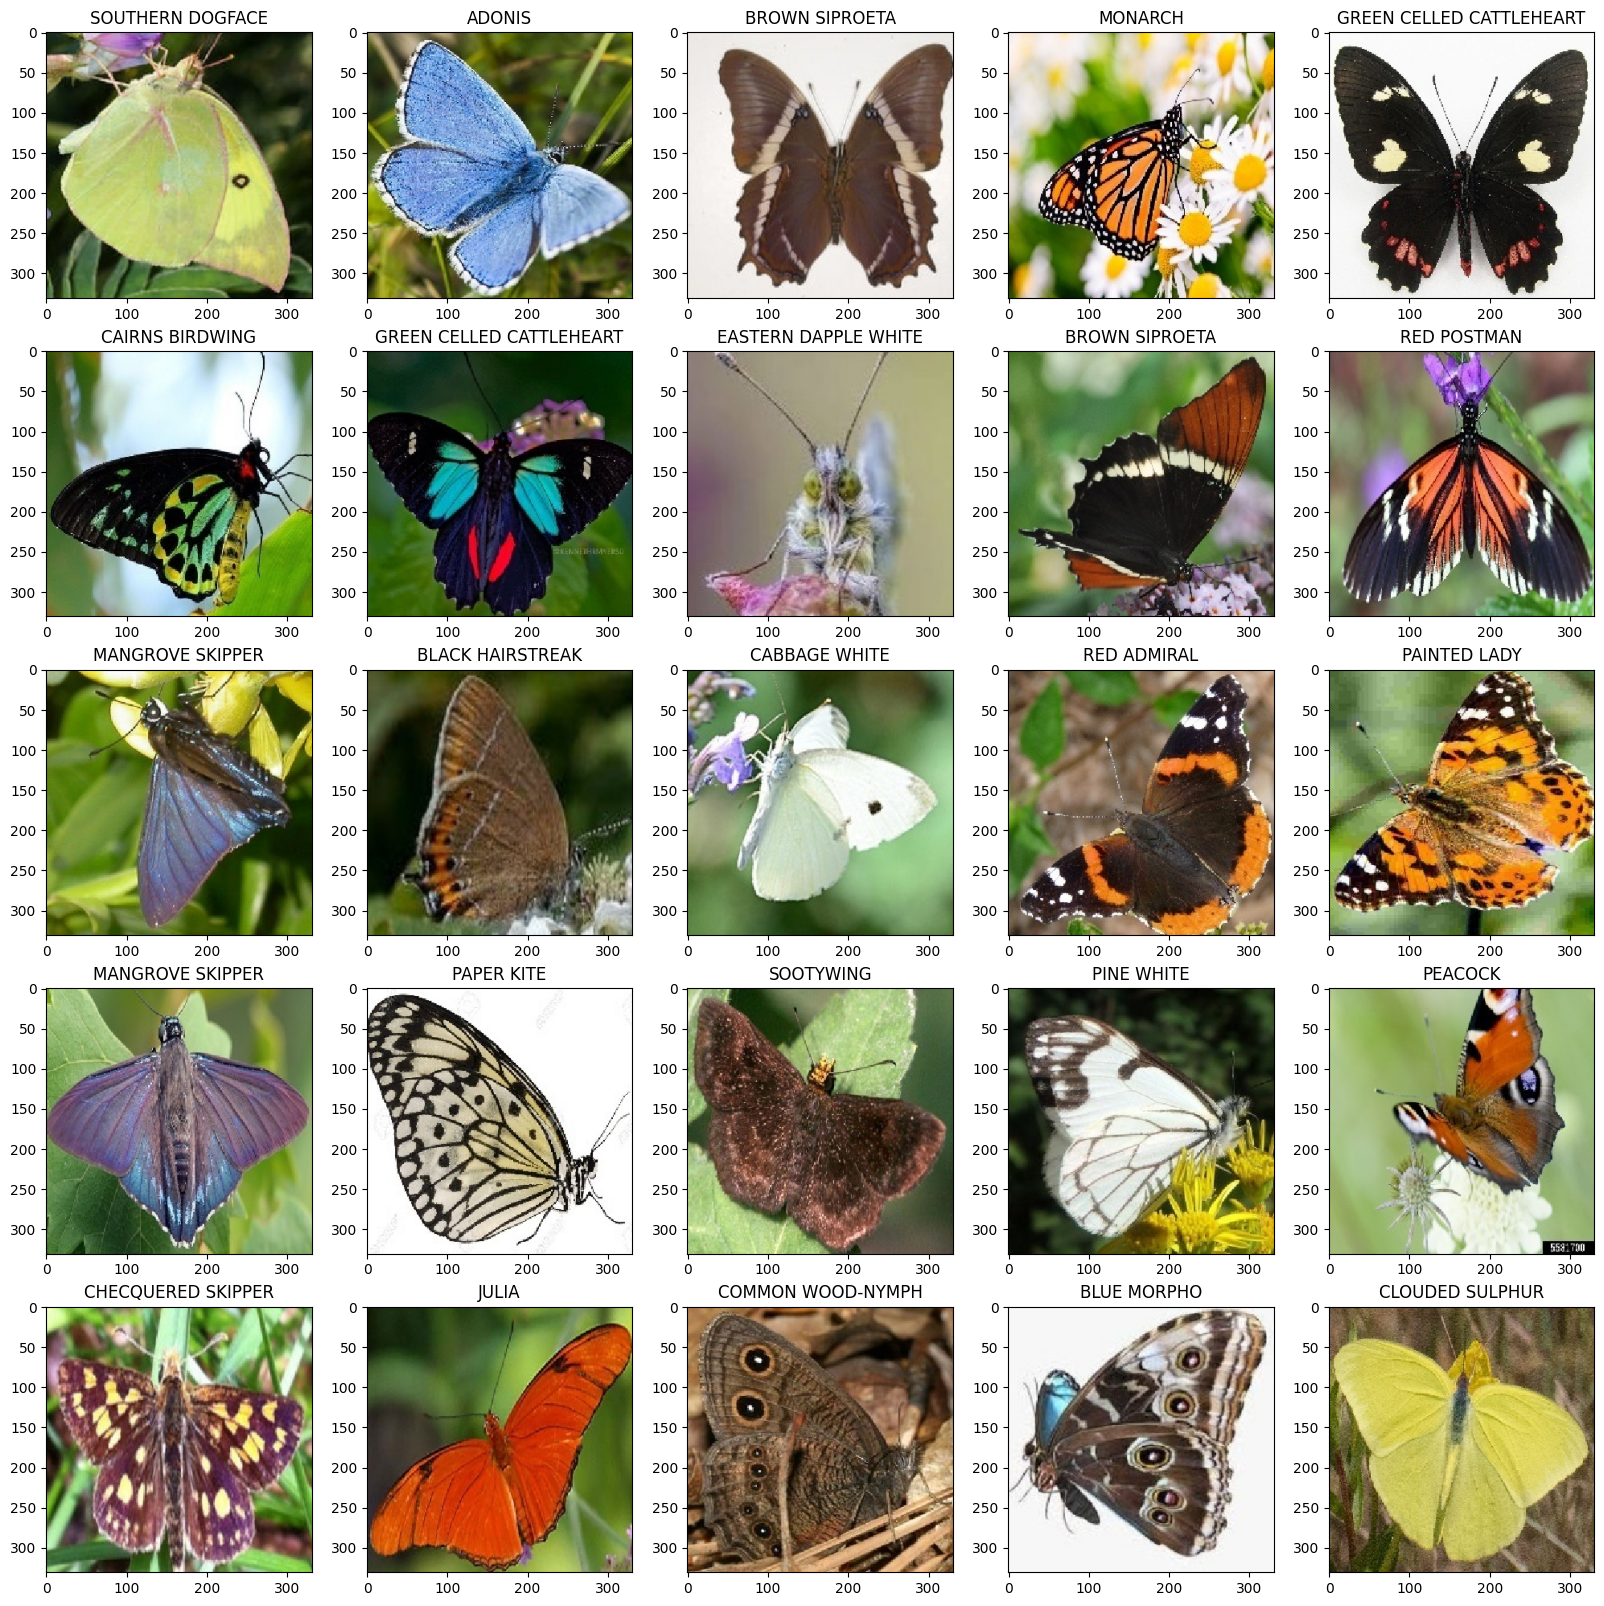

In [125]:
# np.where(y[5]==1)[0][0]

# lets check some dogs and their breeds
n=25

# setup the figure 
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32')) # .astype('int32') ---> as imshow() needs integer data to read the image
    

In [126]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [127]:
# Hyperparameters
batch_size= 128
epochs=50
learn_rate=.001
sgd = SGD(learning_rate=learn_rate, momentum=0.9, nesterov=False)
adam = Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)



Model Building

In [128]:
#function to extract features from the dataset by a given pretrained model
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    
    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [129]:
# Extract features using InceptionV3 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X)

204/204 ━━━━━━━━━━━━━━━━━━━━ 384s 2s/step
Feature maps shape:  (6499, 2048)


In [130]:
# Extract features using Xception 
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X)

204/204 ━━━━━━━━━━━━━━━━━━━━ 1037s 5s/step
Feature maps shape:  (6499, 2048)


In [131]:
# Extract features using InceptionResNetV2 
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input
inc_resnet_features = get_features(InceptionResNetV2,
                                   inc_resnet_preprocessor,
                                   img_size, X)

204/204 ━━━━━━━━━━━━━━━━━━━━ 975s 5s/step
Feature maps shape:  (6499, 1536)


In [132]:
# Extract features using NASNetLarge 
from keras.applications.nasnet import NASNetLarge, preprocess_input
nasnet_preprocessor = preprocess_input
nasnet_features = get_features(NASNetLarge,
                               nasnet_preprocessor,
                               img_size, X)

204/204 ━━━━━━━━━━━━━━━━━━━━ 2416s 12s/step
Feature maps shape:  (6499, 4032)


In [133]:
del X #to free up some ram memory
gc.collect()

185040

In [134]:

#Creating final featuremap by combining all extracted features

final_features = np.concatenate([inception_features,
                                 xception_features,
                                 nasnet_features,
                                 inc_resnet_features,], axis=-1) #axis=-1 to concatinate horizontally

print('Final feature maps shape', final_features.shape)

Final feature maps shape (6499, 9664)


In [135]:
# กำหนดและคอมไพล์โมเดล
model = Sequential()
model.add(Dropout(0.7, input_shape=(final_features.shape[1],)))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ฝึกโมเดล
history = model.fit(final_features, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[lrr, EarlyStop])


Epoch 1/50


d:\python\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1863 - loss: 3.4909 - val_accuracy: 0.6446 - val_loss: 1.6730 - learning_rate: 0.0010
Epoch 2/50
 7/41 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6246 - loss: 1.6230

d:\python\Lib\site-packages\keras\src\callbacks\callback_list.py:97: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6425 - loss: 1.5155 - val_accuracy: 0.7477 - val_loss: 1.1680 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7590 - loss: 1.0589 - val_accuracy: 0.8092 - val_loss: 0.9153 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8057 - loss: 0.8330 - val_accuracy: 0.8131 - val_loss: 0.8170 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8393 - loss: 0.6882 - val_accuracy: 0.8385 - val_loss: 0.7201 - learning_rate: 0.0010
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8623 - loss: 0.5808 - val_accuracy: 0.8469 - val_loss: 0.6700 - learning_rate: 0.0010
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8765 - loss: 0.5094 - val_accuracy: 0.8600 - val_loss: 0.6116 - learning_rate: 0.0010
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9087 - loss: 0.4492 - val_accuracy: 0.86

In [136]:
#deleting to free up ram memory

del inception_features
del xception_features
del nasnet_features
del inc_resnet_features
del final_features
gc.collect()

7931

In [94]:
# sample_df = pd.read_csv('/kaggle/input/dog-breed-identification/sample_submission.csv')

In [95]:
# sample_df.shape

In [137]:
#Function to read images from test directory

def images_to_array_test(test_path, img_size = (331,331,3)):
    test_filenames = [test_path + fname for fname in os.listdir(test_path)]

    data_size = len(test_filenames)
    images = np.zeros([data_size, img_size[0], img_size[1], 3], dtype=np.uint8)
    
    
    for ix,img_dir in enumerate(tqdm(test_filenames)):
#         img_dir = os.path.join(directory, image_name + '.jpg')
        img = load_img(img_dir, target_size = img_size)
#         img = np.expand_dims(img, axis=0)
#         img = processed_image_resnet(img)
#         img = img/255
        images[ix]=img
#         images[ix] = img_to_array(img)
        del img
    print('Ouptut Data Size: ', images.shape)
    return images

test_data = images_to_array_test('D:/Data/test/', img_size)


  0%|          | 0/2786 [00:00<?, ?it/s]

100%|██████████| 2786/2786 [00:05<00:00, 474.27it/s]


Ouptut Data Size:  (2786, 331, 331, 3)


In [138]:
#Extract test data features.
def extact_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    xception_features = get_features(Xception, xception_preprocessor, img_size, data)
    nasnet_features = get_features(NASNetLarge, nasnet_preprocessor, img_size, data)
    inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     nasnet_features,
                                     inc_resnet_features],axis=-1)
    
    print('Final feature maps shape', final_features.shape)
    
    #deleting to free up ram memory
    del inception_features
    del xception_features
    del nasnet_features
    del inc_resnet_features
    gc.collect()
    
    
    return final_features

test_features = extact_features(test_data)

88/88 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step
Feature maps shape:  (2786, 2048)
88/88 ━━━━━━━━━━━━━━━━━━━━ 449s 5s/step
Feature maps shape:  (2786, 2048)
88/88 ━━━━━━━━━━━━━━━━━━━━ 1053s 12s/step
Feature maps shape:  (2786, 4032)
88/88 ━━━━━━━━━━━━━━━━━━━━ 446s 5s/step
Feature maps shape:  (2786, 1536)
Final feature maps shape (2786, 9664)


In [139]:
#Free up some space.
del test_data
gc.collect()

0

In [140]:
#Predict test labels given test data features.

pred = model.predict(test_features)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [141]:
# First prediction
print(pred[0])
print(f"Max value (probability of prediction): {np.max(pred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(pred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(pred[0])]}")

[7.4945874e-08 9.1274416e-08 6.2316593e-07 2.0194733e-08 3.9679460e-05
 1.5938628e-10 2.3557261e-07 2.7941297e-07 7.7021629e-02 8.2691354e-11
 3.2175936e-07 2.4475639e-09 1.2006038e-07 2.7910615e-03 1.5676385e-10
 4.1485004e-07 1.1167720e-07 9.1057072e-06 2.4255303e-04 1.4555847e-07
 1.0079556e-04 1.9431973e-05 4.6274506e-10 5.1528919e-09 7.4127137e-12
 4.9147303e-07 1.0702129e-08 2.1599742e-02 1.2397347e-11 1.1170758e-05
 9.5039754e-09 1.2928489e-10 8.7403396e-07 9.7401914e-07 1.3550839e-06
 4.0334278e-09 9.1788039e-08 2.7838203e-07 8.9841291e-02 5.7904235e-06
 1.2733879e-06 9.2515489e-05 5.7071655e-05 5.8670802e-09 1.8566181e-09
 1.4679041e-10 3.4642177e-08 7.4314361e-04 4.8944122e-07 2.4196201e-10
 2.9497988e-07 1.5050279e-08 8.0615842e-01 1.8665352e-07 2.7294031e-09
 2.0042081e-09 2.0356998e-09 4.7623254e-07 1.3813013e-09 6.6742714e-08
 1.2230097e-08 6.9204913e-11 2.0124392e-04 1.6907208e-06 6.5073628e-08
 1.6160468e-05 9.9770189e-04 1.2942790e-11 7.2117643e-08 7.7575635e-07
 3.695

In [142]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["filename"] + list(classes))
preds_df.head()

Empty DataFrame
Columns: [filename, ADONIS, AFRICAN GIANT SWALLOWTAIL, AMERICAN SNOOT, AN 88, APPOLLO, ATALA, BANDED ORANGE HELICONIAN, BANDED PEACOCK, BECKERS WHITE, BLACK HAIRSTREAK, BLUE MORPHO, BLUE SPOTTED CROW, BROWN SIPROETA, CABBAGE WHITE, CAIRNS BIRDWING, CHECQUERED SKIPPER, CHESTNUT, CLEOPATRA, CLODIUS PARNASSIAN, CLOUDED SULPHUR, COMMON BANDED AWL, COMMON WOOD-NYMPH, COPPER TAIL, CRECENT, CRIMSON PATCH, DANAID EGGFLY, EASTERN COMA, EASTERN DAPPLE WHITE, EASTERN PINE ELFIN, ELBOWED PIERROT, GOLD BANDED, GREAT EGGFLY, GREAT JAY, GREEN CELLED CATTLEHEART, GREY HAIRSTREAK, INDRA SWALLOW, IPHICLUS SISTER, JULIA, LARGE MARBLE, MALACHITE, MANGROVE SKIPPER, MESTRA, METALMARK, MILBERTS TORTOISESHELL, MONARCH, MOURNING CLOAK, ORANGE OAKLEAF, ORANGE TIP, ORCHARD SWALLOW, PAINTED LADY, PAPER KITE, PEACOCK, PINE WHITE, PIPEVINE SWALLOW, POPINJAY, PURPLE HAIRSTREAK, PURPLISH COPPER, QUESTION MARK, RED ADMIRAL, RED CRACKER, RED POSTMAN, RED SPOTTED PURPLE, SCARCE SWALLOW, SILVER SPOT SKIPPER, SLEEPY ORANGE, SOOTYWING, SOUTHERN DOGFACE, STRAITED QUEEN, TROPICAL LEAFWING, TWO BARRED FLASHER, ULYSES, VICEROY, WOOD SATYR, YELLOW SWALLOW TAIL, ZEBRA LONG WING]
Index: []

[0 rows x 76 columns]

In [143]:
# Append test image ID's to predictions DataFrame
test_path = "D:/Data/test"
preds_df["filename"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

filename ADONIS AFRICAN GIANT SWALLOWTAIL AMERICAN SNOOT AN 88 APPOLLO  \
0     Image_1    NaN                       NaN            NaN   NaN     NaN   
1    Image_10    NaN                       NaN            NaN   NaN     NaN   
2   Image_100    NaN                       NaN            NaN   NaN     NaN   
3  Image_1000    NaN                       NaN            NaN   NaN     NaN   
4  Image_1001    NaN                       NaN            NaN   NaN     NaN   

  ATALA BANDED ORANGE HELICONIAN BANDED PEACOCK BECKERS WHITE  ... SOOTYWING  \
0   NaN                      NaN            NaN           NaN  ...       NaN   
1   NaN                      NaN            NaN           NaN  ...       NaN   
2   NaN                      NaN            NaN           NaN  ...       NaN   
3   NaN                      NaN            NaN           NaN  ...       NaN   
4   NaN                      NaN            NaN           NaN  ...       NaN   

  SOUTHERN DOGFACE STRAITED QUEEN TROPICAL LEAFWING TWO BARRED FLASHER ULYSES  \
0              NaN            NaN               NaN                NaN    NaN   
1              NaN            NaN               NaN                NaN    NaN   
2              NaN            NaN               NaN                NaN    NaN   
3              NaN            NaN               NaN                NaN    NaN   
4              NaN            NaN               NaN                NaN    NaN   

  VICEROY WOOD SATYR YELLOW SWALLOW TAIL ZEBRA LONG WING  
0     NaN        NaN                 NaN             NaN  
1     NaN        NaN                 NaN             NaN  
2     NaN        NaN                 NaN             NaN  
3     NaN        NaN                 NaN             NaN  
4     NaN        NaN                 NaN             NaN  

[5 rows x 76 columns]

In [144]:
preds_df.loc[:,list(classes)]= pred

preds_df.to_csv('submission.csv',index=None)
preds_df.head()

filename    ADONIS AFRICAN GIANT SWALLOWTAIL AMERICAN SNOOT     AN 88  \
0     Image_1       0.0                       0.0       0.000001       0.0   
1    Image_10       0.0                  0.000002            0.0       0.0   
2   Image_100       0.0                       0.0       0.000085       0.0   
3  Image_1000       0.0                       0.0            0.0       0.0   
4  Image_1001  0.002871                       0.0       0.000034  0.000005   

   APPOLLO     ATALA BANDED ORANGE HELICONIAN BANDED PEACOCK BECKERS WHITE  \
0  0.00004       0.0                      0.0            0.0      0.077022   
1      0.0       0.0                 0.000006            0.0           0.0   
2      0.0       0.0                 0.000506       0.000354           0.0   
3      0.0       0.0                 0.000182            0.0           0.0   
4      0.0  0.000007                 0.000004       0.000627           0.0   

   ... SOOTYWING SOUTHERN DOGFACE STRAITED QUEEN TROPICAL LEAFWING  \
0  ...  0.000016         0.000998            0.0               0.0   
1  ...       0.0              0.0            0.0               0.0   
2  ...  0.000042         0.000001            0.0          0.000065   
3  ...       0.0         0.000246            0.0          0.000379   
4  ...  0.000136              0.0            0.0          0.000006   

  TWO BARRED FLASHER    ULYSES VICEROY WOOD SATYR YELLOW SWALLOW TAIL  \
0           0.000001  0.000037     0.0        0.0            0.000002   
1                0.0       0.0     0.0        0.0            0.000001   
2           0.000007  0.000002     0.0        0.0                 0.0   
3                0.0       0.0     0.0        0.0                 0.0   
4           0.000806  0.002067     0.0        0.0            0.000186   

  ZEBRA LONG WING  
0             0.0  
1        0.999836  
2        0.000002  
3             0.0  
4        0.000006  

[5 rows x 76 columns]

Testing with custom input:

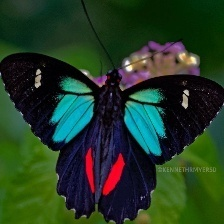

In [145]:
#Custom input

Image('D:/Data/train/Image_7.jpg')


In [146]:
#reading the image and converting it into an np array

img_g = load_img('D:/Data/train/Image_7.jpg',target_size = img_size)
img_g = np.expand_dims(img_g, axis=0) # as we trained our model in (row, img_height, img_width, img_rgb) format, np.expand_dims convert the image into this format
# img_g

In [147]:
img_g.shape

(1, 331, 331, 3)

In [149]:
# #Predict test labels given test data features.

test_features = extact_features(img_g)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Feature maps shape:  (1, 2048)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Feature maps shape:  (1, 2048)
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Feature maps shape:  (1, 4032)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Feature maps shape:  (1, 1536)
Final feature maps shape (1, 9664)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted label: GREEN CELLED CATTLEHEART
Probability of prediction): 100 %
